In [336]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder

In [337]:
# import cleaned dataset from last project - https://github.com/SarahNadeau/datascience-projectB/blob/master/cleaned.csv
data = pd.DataFrame.from_csv('cleaned.csv')
encoded_data = pd.DataFrame.from_csv('cleaned.csv')

# create meaningful encodings for ordinal data
BsmtQual = data['BsmtQual']
encodings = {'Ex': 6, 'Gd': 5, 'TA': 4, 'Fa': 3, 'Po': 2, 'NP' :1}
for key in encodings:
    BsmtQual = BsmtQual.replace(key, encodings[key])
data['BsmtQual'] = BsmtQual

ExterQual = data['ExterQual']
encodings = {'Ex': 6, 'Gd': 5, 'TA': 4, 'Fa': 3, 'Po': 2, 'NP' :1}
for key in encodings:
    ExterQual = ExterQual.replace(key, encodings[key])
data['ExterQual'] = ExterQual
    
ExterCond = data['ExterCond']
encodings = {'Ex': 6, 'Gd': 5, 'TA': 4, 'Fa': 3, 'Po': 2, 'NP' :1}
for key in encodings:
    ExterCond = ExterCond.replace(key, encodings[key])
data['ExterCond'] = ExterCond
    
BsmtCond = data['BsmtCond']
encodings = {'Ex': 6, 'Gd': 5, 'TA': 4, 'Fa': 3, 'Po': 2, 'NP' :1}
for key in encodings:
    BsmtCond = BsmtCond.replace(key, encodings[key])
data['BsmtCond'] = BsmtCond
    
KitchenQual = data['KitchenQual']
encodings = {'Ex': 6, 'Gd': 5, 'TA': 4, 'Fa': 3, 'Po': 2, 'NP' :1}
for key in encodings:
    KitchenQual = KitchenQual.replace(key, encodings[key])
data['KitchenQual'] = KitchenQual
    
GarageQual = data['GarageQual']
encodings = {'Ex': 6, 'Gd': 5, 'TA': 4, 'Fa': 3, 'Po': 2, 'NP' :1}
for key in encodings:
    GarageQual = GarageQual.replace(key, encodings[key])
data['GarageQual'] = GarageQual

FireplaceQu = data['FireplaceQu']
encodings = {'Ex': 6, 'Gd': 5, 'TA': 4, 'Fa': 3, 'Po': 2, 'NP' :1}
for key in encodings:
    FireplaceQu = FireplaceQu.replace(key, encodings[key])
data['FireplaceQu'] = FireplaceQu

LandSlope = data['LandSlope']
encodings = {'Gtl': 1, 'Mod': 2, 'Sev': 3}
for key in encodings:
    LandSlope = LandSlope.replace(key, encodings[key])
data['LandSlope'] = LandSlope

HeatingQC = data['HeatingQC']
encodings = {'Ex': 6, 'Gd': 5, 'TA': 4, 'Fa': 3, 'Po': 2, 'NP' :1}
for key in encodings:
    HeatingQC = HeatingQC.replace(key, encodings[key])
data['HeatingQC'] = HeatingQC

BsmtExposure = data['BsmtExposure']
encodings = {'Gd': 6, 'Av': 5, 'Mn': 4, 'No': 3, 'NA': 2, 'NP': 1}
for key in encodings:
    BsmtExposure = BsmtExposure.replace(key, encodings[key])
data['BsmtExposure'] = BsmtExposure

GarageCond = data['GarageCond']
encodings = {'Ex': 6, 'Gd': 5, 'TA': 4, 'Fa': 3, 'Po': 2, 'NP' :1}
for key in encodings:
    GarageCond = GarageCond.replace(key, encodings[key])
data['GarageCond'] = GarageCond

PoolQC = data['PoolQC']
encodings = {'Ex': 4, 'Gd': 3, 'Fa': 2, 'NP' :1}
for key in encodings:
    PoolQC = PoolQC.replace(key, encodings[key])
data['PoolQC'] = PoolQC

# use label encoder for nominal data columns
enc = LabelEncoder()
for col in data.columns:
    if data[col].dtype != 'float64' and data[col].dtype != 'int64': 
        encoded_data[col] = enc.fit_transform(encoded_data[col])
    else:
        encoded_data[col] = data[col]

In [338]:
# make sale price a categorical feature
labels = [ "{0} - {1}".format(i, i + 100000) for i in range(0, 1000000, 100000) ]
encoded_data['Sale_Price_Categories'] = pd.cut(encoded_data.SalePrice, range(0, 1050000, 100000), right=False, labels=labels)

In [339]:
# find numerical features with significant correlation to SalePrice
columns = encoded_data.columns
column_dtypes = encoded_data.dtypes
numerical_types = [np.int64, np.int32, np.float32, np.float64]

valid_col = [columns[i] for i in range(len(columns)) if column_dtypes[i] in numerical_types]
X = pd.DataFrame(encoded_data, columns = valid_col)
corr = np.corrcoef(X, rowvar=False)
sale_price_corr_coef = corr[-1][:-1]  # get SalePrice corrcoef with everything else

significant_col = []  
significant_col_values = []
sig_threshold = 0.5 # arbitrarily set
for i in range(len(sale_price_corr_coef)):
    corr_coef = sale_price_corr_coef[i]
    if abs(corr_coef) >= sig_threshold:
        significant_col.append(valid_col[i])
        significant_col_values.append(corr_coef)
print("\nBelow are the columns (and correlation coefficients) that have been deemed significant (absolute coefficient >= 0.5) and will be used " +
      "in the model:\n")
for i in range(len(significant_col)):
    print("{}. {}: {:.2f}".format(i+1, significant_col[i], significant_col_values[i]))
    
# feature_set = encoded_data.filter(significant_col)
feature_set = encoded_data


Below are the columns (and correlation coefficients) that have been deemed significant (absolute coefficient >= 0.5) and will be used in the model:

1. OverallQual: 0.79
2. YearBuilt: 0.52
3. YearRemodAdd: 0.51
4. ExterQual: 0.68
5. BsmtQual: 0.59
6. TotalBsmtSF: 0.62
7. 1stFlrSF: 0.61
8. GrLivArea: 0.71
9. FullBath: 0.56
10. KitchenQual: 0.66
11. TotRmsAbvGrd: 0.53
12. FireplaceQu: 0.52
13. GarageCars: 0.64
14. GarageArea: 0.62


In [344]:
# split into training and testing sets
Y = encoded_data['Sale_Price_Categories']
# Y = encoded_data['SalePrice']
X_train, X_test, Y_train, Y_test = train_test_split(feature_set, Y, test_size=.1)

X = X_train.drop('Sale_Price_Categories', 1)
X = X.drop('SalePrice', 1)
Y = Y_train
X_test = X_test.drop('Sale_Price_Categories', 1)
X_test = X_test.drop('SalePrice', 1)

In [345]:
# calculate the baseline for SalePrice
baseline = encoded_data.Sale_Price_Categories.describe()['freq']/len(encoded_data.Sale_Price_Categories)
print("% of most frequent category as baseline is: {:.2f}".format(baseline))

# prices = encoded_data.filter(['SalePrice'])
# avg_price = prices.mean()
# E = Y_test.subtract(avg_price[0])
# SE = E ** 2
# MSE = SE.mean()
# baseline = MSE ** 0.5
# print("Root mean squared error of baseline for SalePrice: {:.2f}".format(baseline))

% of most frequent category as baseline is: 0.62


In [346]:
# adaboost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
seed = 9001

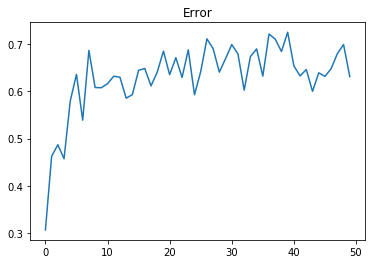

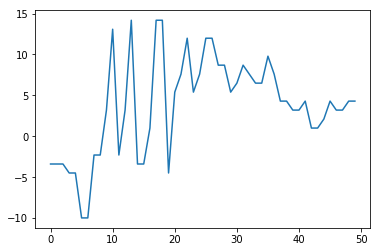

4.30% improvement over the baseline


In [347]:
# one model
boosted_tree = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), algorithm="SAMME", 
                                  n_estimators=50, random_state = seed)
model = boosted_tree.fit(X, Y)
plt.plot(model.estimator_errors_)
plt.title("Error")
plt.show()

staged_improvement = []
for predictions in model.staged_predict(X_test):
    successes = 0
    for i in range(0, len(predictions)):
        if predictions[i] == Y_test.iloc[i]:
            successes += 1
    success_rate = successes/len(Y_test)
    improvement = (success_rate - baseline)*100/baseline
    staged_improvement.append(improvement)
plt.plot(staged_improvement)
plt.show()

predictions = model.predict(X_test)
successes = 0
for i in range(0, len(predictions)):
    if predictions[i] == Y_test.iloc[i]:
        successes += 1
success_rate = successes/len(Y_test)
print("{:.2f}% improvement over the baseline".format((success_rate - baseline)*100/baseline))

# staged_improvement = []
# for predictions in model.staged_predict(X_test):
#     E = predictions - Y_test
#     SE = E ** 2
#     MSE = SE.mean()
#     test_RMSE = MSE ** 0.5
#     improvement = (test_RMSE - baseline)*100/baseline
#     staged_improvement.append(improvement)
# plt.plot(staged_improvement)
# plt.show()
    
# predictions = model.predict(X_test)
# E = predictions - Y_test
# SE = E ** 2
# MSE = SE.mean()
# model_RMSE = MSE ** 0.5
# improvement = (model_RMSE - baseline)*100/baseline
# print("{:.2f}% improvement over the baseline".format(improvement))